In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
corr = df.corr()
# corr = corr["Chance of Admit "]

In [6]:
corr = corr[corr > 0.5]

<Axes: >

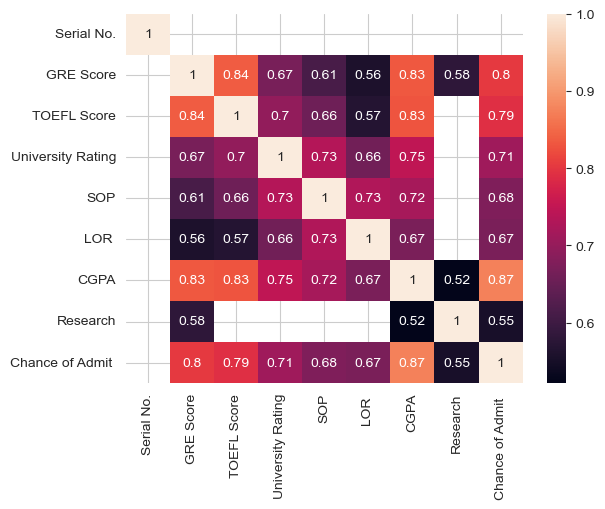

In [7]:
sns.heatmap(corr, annot=True)

In [8]:
# Using the heatmap above we can make out that the fields other than the Serial no are influencing heavily the chances of acceptance.

# Will Binarize the output variable (Chances of acceptance) for values either 0 or 1

from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)

In [9]:
df["Chance of Admit "] = bi.fit_transform(df[["Chance of Admit "]])

In [10]:
df["Chance of Admit "]

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [11]:
# Data is in the floating point format will bring it to int format

df["Chance of Admit "] = df["Chance of Admit "].astype(int)
df["Chance of Admit "]

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

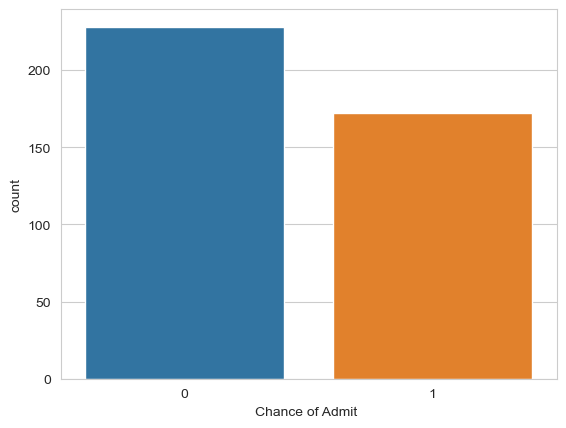

In [12]:
sns.countplot(x=df["Chance of Admit "])

In [13]:
df["Chance of Admit "].value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

In [14]:
x = df.drop("Chance of Admit ", axis=1)
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [15]:
y = df["Chance of Admit "]
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.25)

In [18]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(300, 8)
(100, 8)
(300,)
(100,)


In [19]:
yTrain = yTrain.values.reshape(300,1)
yTest = yTest.values.reshape(100,1)

In [20]:
print(yTrain.shape)
print(yTest.shape)

(300, 1)
(100, 1)


In [21]:
# Starting with Classification

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier(random_state=23)

In [24]:
tree.fit(xTrain,yTrain)

DecisionTreeClassifier(random_state=23)

In [25]:
pred = tree.predict(xTest)

In [26]:
pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [27]:
# Cross validations

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [29]:
import matplotlib.pyplot as plt

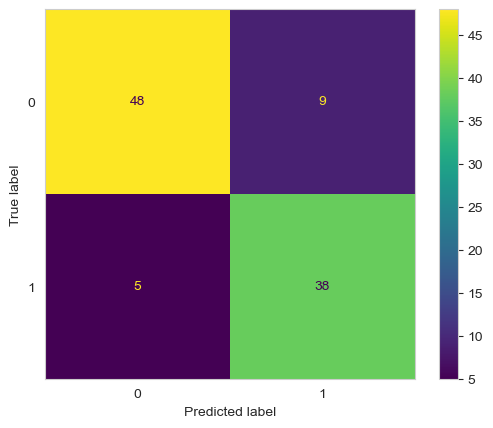

In [30]:
ConfusionMatrixDisplay.from_predictions(yTest, pred)
plt.grid(visible=False)

In [31]:
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        57
           1       0.81      0.88      0.84        43

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
randForest = RandomForestClassifier()

In [34]:
randForest.fit(xTrain, yTrain)

C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [35]:
randPred = randForest.predict(xTest)

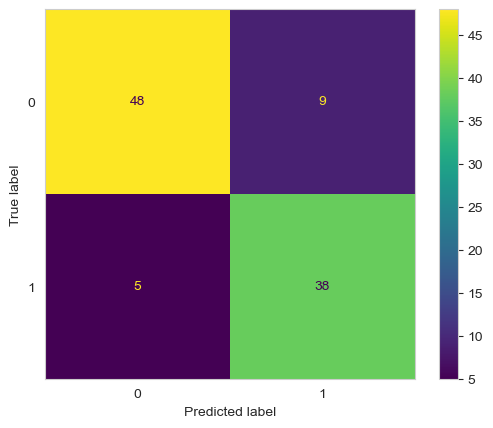

In [37]:
ConfusionMatrixDisplay.from_predictions(yTest, pred)
plt.grid(visible=False)

In [38]:
print(classification_report(yTest, randPred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        57
           1       0.88      0.88      0.88        43

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

